## Bitly Data from 1.USA.gov
In 2011, the URL shortening service Bitly partnered with the US government website USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil. In 2011, a live feed as well as hourly snapshots were available as downloadable text files.

In [3]:
# Explore data
path = "data/bitly_usagov.txt"

with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [4]:
# Each line in each file contains a common form of web data known as JSON.
import json
with open(path) as f:
    data = [json.loads(line) for line in f]

data[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

## Counting Time Zones with pandas

In [5]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [6]:
df['tz'].unique()

array(['America/New_York', 'America/Denver', 'America/Sao_Paulo',
       'Europe/Warsaw', '', 'America/Los_Angeles', nan, 'Asia/Hong_Kong',
       'Europe/Rome', 'Africa/Ceuta', 'Europe/Madrid',
       'Asia/Kuala_Lumpur', 'Asia/Nicosia', 'Europe/London',
       'Pacific/Honolulu', 'America/Chicago', 'Europe/Malta',
       'Europe/Lisbon', 'Europe/Paris', 'Europe/Copenhagen',
       'America/Mazatlan', 'Europe/Dublin', 'Europe/Brussels',
       'America/Vancouver', 'Europe/Amsterdam', 'Europe/Prague',
       'Europe/Stockholm', 'America/Anchorage', 'Asia/Bangkok',
       'Europe/Berlin', 'America/Rainy_River', 'Europe/Budapest',
       'Asia/Tokyo', 'Europe/Vienna', 'America/Phoenix', 'Asia/Jerusalem',
       'Asia/Karachi', 'America/Bogota', 'America/Indianapolis',
       'America/Montreal', 'Asia/Calcutta', 'Europe/Skopje',
       'Asia/Beirut', 'Australia/NSW', 'Chile/Continental',
       'America/Halifax', 'America/Edmonton', 'Europe/Bratislava',
       'America/Recife', 'Africa/Ca

In [7]:
df['tz'].value_counts()

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: tz, Length: 97, dtype: int64

We can visualize this data using matplotlib. We can make the plots a bit nicer by filling in a substitute value for unknown or missing time zone data in the records. We replace the missing values with the fillna method and use Boolean array indexing for the empty strings

In [8]:
clean_tz = df['tz'].fillna("Missing")
clean_tz[clean_tz==''] = 'Unknow'
tz_count = clean_tz.value_counts()

<AxesSubplot: >

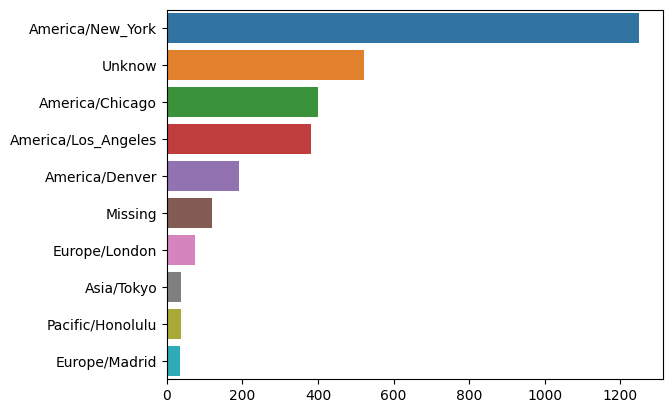

In [9]:
import seaborn as sns

subset_tz = tz_count.head(10)
sns.barplot(y=subset_tz.index, x = subset_tz.to_numpy())

In [10]:
results = pd.Series([x.split()[0] for x in df["a"].dropna()])
results.head(5)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [11]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

Now, suppose you wanted to decompose the top time zones into Windows and non-Windows users. As a simplification, let’s say that a user is on Windows if the string "Windows" is in the agent string. Since some of the agents are missing, we’ll exclude these from the data:

In [12]:
cframe = df[df["a"].notna()].copy()

In [13]:
import numpy as np
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Not Windows")

In [14]:
by_tz_os = cframe.groupby(["tz", "os"])

In [15]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


## MovieLens 1M Dataset
GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provides movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation). Such data is often of interest in the development of recommendation systems based on machine learning algorithms. While we do not explore machine learning techniques in detail in this book, I will show you how to slice and dice datasets like these into the exact form you need.

The MovieLens 1M dataset contains one million ratings collected from six thousand users on four thousand movies. It’s spread across three tables: ratings, user information, and movie information. We can load each table into a pandas DataFrame object using pandas.read_table. Run the following code in a Jupyter cell:

In [16]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table("data/users.dat", sep="::",
                        header=None, names=unames, engine="python")

rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table("data/ratings.dat", sep="::",
                        header=None, names=rnames, engine="python")

mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("data/movies.dat", sep="::",
                       header=None, names=mnames, engine="python")

In [17]:
# You can verify that everything succeeded by looking at each DataFrame:
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [18]:
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [19]:
movies.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Note that ages and occupations are coded as integers indicating groups described in the dataset’s README file. Analyzing the data spread across three tables is not a simple task; for example, suppose you wanted to compute mean ratings for a particular movie by gender identity and age. As you will see, this is more convenient to do with all of the data merged together into a single table. Using pandas’s merge function, we first merge ratings with users and then merge that result with the movies data. pandas infers which columns to use as the merge (or join) keys based on overlapping names:

In [20]:
merge = pd.merge(ratings, users, how='inner', on='user_id')
merge

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067
...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106
1000205,6040,1094,5,956704887,M,25,6,11106
1000206,6040,562,5,956704746,M,25,6,11106
1000207,6040,1096,4,956715648,M,25,6,11106


In [21]:
data = pd.merge(merge, movies, how='inner', on='movie_id')
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   timestamp   1000209 non-null  int64 
 4   gender      1000209 non-null  object
 5   age         1000209 non-null  int64 
 6   occupation  1000209 non-null  int64 
 7   zip         1000209 non-null  object
 8   title       1000209 non-null  object
 9   genres      1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:

In [23]:
mean_ratings = data.pivot_table(values='rating', index='title', columns='gender', aggfunc=np.mean)
mean_ratings.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


This produced another DataFrame containing mean ratings with movie titles as row labels (the "index") and gender as column labels. I first filter down to movies that received at least 250 ratings (an arbitrary number); to do this, I group the data by title, and use size() to get a Series of group sizes for each title:

In [24]:
ratings_by_title = data.groupby("title").size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [25]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [26]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

The index of titles receiving at least 250 ratings can then be used to select rows from `mean_ratings using .loc`:

In [27]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [28]:
top_female_view = mean_ratings.sort_values("F", ascending=False)
top_female_view

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


### Measuring Rating Disagreement
Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to mean_ratings containing the difference in means, then sort by that:

In [29]:
mean_ratings["diff"] = mean_ratings["M"] - mean_ratings["F"]

sorted_by_diff = mean_ratings.sort_values("diff")
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate as highly:

In [30]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


Suppose instead you wanted the movies that elicited the most disagreement among viewers, independent of gender identification. Disagreement can be measured by the variance or standard deviation of the ratings. To get this, we first compute the rating standard deviation by title and then filter down to the active titles:

In [31]:
rating_std_by_title = data.groupby("title")["rating"].std()
rating_std_by_title.loc[active_titles]
rating_std_by_title.head()

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

Then, we sort in descending order and select the first 10 rows, which are roughly the 10 most divisively rated movies:

In [32]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Foreign Student (1994)                                             2.828427
Criminal Lovers (Les Amants Criminels) (1999)                      2.309401
Identification of a Woman (Identificazione di una donna) (1982)    2.121320
Tokyo Fist (1995)                                                  2.121320
Better Living (1998)                                               2.121320
Paralyzing Fear: The Story of Polio in America, A (1998)           2.121320
Eaten Alive (1976)                                                 2.121320
Living Dead Girl, The (La Morte Vivante) (1982)                    2.121320
Sunset Park (1996)                                                 2.121320
Talk of Angels (1998)                                              2.121320
Name: rating, dtype: float64

You may have noticed that movie genres are given as a pipe-separated (|) string, since a single movie can belong to multiple genres. To help us group the ratings data by genre, we can use the explode method on DataFrame. Let's take a look at how this works. First, we can split the genres string into a list of genres using the `str.split` method on the Series:

In [33]:
movies['genres'].head()

0     Animation|Children's|Comedy
1    Adventure|Children's|Fantasy
2                  Comedy|Romance
3                    Comedy|Drama
4                          Comedy
Name: genres, dtype: object

In [34]:
movies['genres'].str.split("|")

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genres, Length: 3883, dtype: object

In [35]:
movies['genres'] = movies.pop('genres').str.split("|")
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]


Now, calling `movies.explode("genre")` generates a new DataFrame with one row for each `"inner"` element in each list of movie genres. For example, if a movie is classified as both a comedy and a romance, then there will be two rows in the result, one with just `"Comedy"` and the other with just `"Romance"`:

In [37]:
movies_exploded = movies.explode("genres")
movies_exploded.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [39]:
ratings_with_genre = pd.merge(pd.merge(movies_exploded, ratings), users)
ratings_with_genre.head(10)

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Children's,1,5,978824268,F,1,10,48067
2,1,Toy Story (1995),Comedy,1,5,978824268,F,1,10,48067
3,48,Pocahontas (1995),Animation,1,5,978824351,F,1,10,48067
4,48,Pocahontas (1995),Children's,1,5,978824351,F,1,10,48067
5,48,Pocahontas (1995),Musical,1,5,978824351,F,1,10,48067
6,48,Pocahontas (1995),Romance,1,5,978824351,F,1,10,48067
7,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
8,260,Star Wars: Episode IV - A New Hope (1977),Action,1,4,978300760,F,1,10,48067
9,260,Star Wars: Episode IV - A New Hope (1977),Adventure,1,4,978300760,F,1,10,48067


In [43]:
genre_ratings  = ratings_with_genre.groupby(["genres", "age"])['rating'].mean()
genre_ratings.head(10)

genres     age
Action     1      3.506385
           18     3.447097
           25     3.453358
           35     3.538107
           45     3.528543
           50     3.611333
           56     3.610709
Adventure  1      3.449975
           18     3.408525
           25     3.443163
Name: rating, dtype: float64

In [44]:
genre_ratings = genre_ratings.unstack("age")

In [45]:
genre_ratings

age,1,18,25,35,45,50,56
genres,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700
